In [67]:
%matplotlib inline

import pyarrow.parquet as pq
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit


import matplotlib.pyplot as plt

import warnings; warnings.simplefilter('ignore')

In [68]:
all_cst = pd.read_csv("data/hh_all.csv") 
all_cst["All Household"] = all_cst["Low Confidence"] + all_cst["High Confidence"]

In [69]:
cnn = all_cst[all_cst['cst'] == 'CNN']
slingtv = all_cst[all_cst['cst'] == 'SlingTV']
espn = all_cst[all_cst['cst'] == 'ESPN']
hbo = all_cst[all_cst['cst'] == 'HBO']
nbcu_central = all_cst[all_cst['cst'] == 'NBCU_Central']
hulu = all_cst[all_cst['cst'] == 'Hulu']

In [74]:
def fit_func(x, a, b, c):
    return a*np.log(x) + b*x + c
    #return a*x + c

f = lambda a,b,c : a * np.log(b) + c
f2 = lambda a,b : a * b
f3 = lambda a,x,b,c : a * np.log(x) + b * x + c

In [85]:
def plot_curve(data):
    #curve fitting
    day_range = len(data)

    x = data["day range"][0:day_range].values
    y = data["All Household"][0:day_range].values

    popt, pcov = curve_fit(fit_func, x, y)
    #hh number
    print("consistent households (per month) %5.2fM" % f(popt[0],30, popt[2]))
    print("ephemeral households (per day) %5.2fM "% popt[1])
    print("total households number %5.0fM "% f3(popt[0],30, popt[1], popt[2]))
    
    #ax1
    plt.figure(figsize=(10,10))
    ax1=plt.subplot(2, 1, 1)
    plt.plot(x, fit_func(x, *popt), 'r-', label='y = %5.2fln(x) + %5.2fx + %5.2f ' % tuple(popt))
    plt.plot(x, y, 'b-', label='predicted all household number')
    plt.xlabel('day range')
    plt.ylabel('# of households(M)')
    plt.legend(loc=2)
    plt.show()
    
    #ax2
    plt.figure(figsize=(10,10))
    ax2=plt.subplot(2, 1, 2)
    x = np.linspace(1,120,120)
    y = f(popt[0], x, popt[2])
    z = f2(popt[1], x)
    plt.plot(x, y, 'r-', label='consistent households(M): y = %5.2fln(x) + %5.2f ' % tuple(np.delete(popt, 1)))
    plt.plot(x, z, 'b-', label='ephemeral households(M): y = %5.2fx' % popt[1])
    plt.xlabel('day range')
    plt.ylabel('# of Households(M)')
    plt.legend(loc=2)
    plt.xticks(rotation=90)
    plt.show()

# CNN

consistent households (per month) 11.26M
ephemeral households (per day)  0.72M 
total households number    33M 


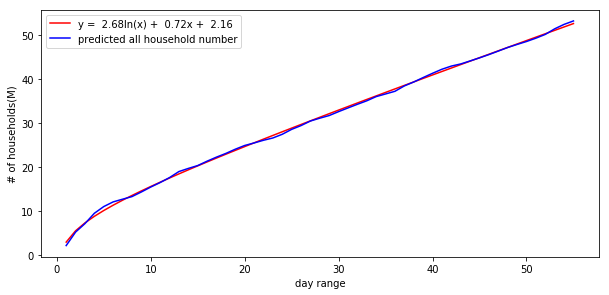

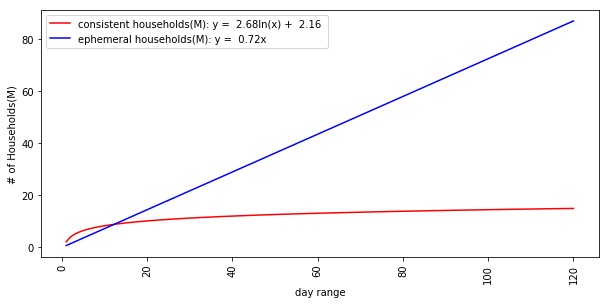

In [86]:
plot_curve(cnn)

# SlingTV

In [62]:
plot_curve(slingtv)

consistent households (per month) 30.10M
ephemeral households (per day)  0.16M 


TypeError: must be str, not numpy.float64

# ESPN

consistent households (per month)  9.65M
ephemeral households (per day)  0.40M 


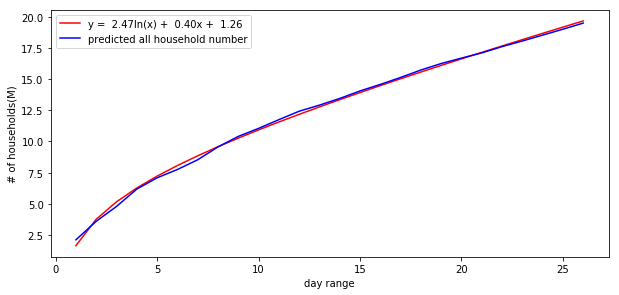

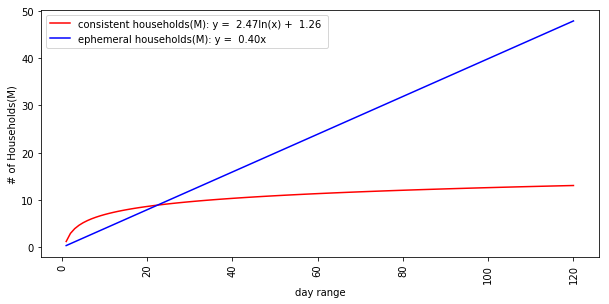

In [51]:
plot_curve(espn)

# HBO

consistent households (per month)  9.27M
ephemeral households (per day)  0.09M 


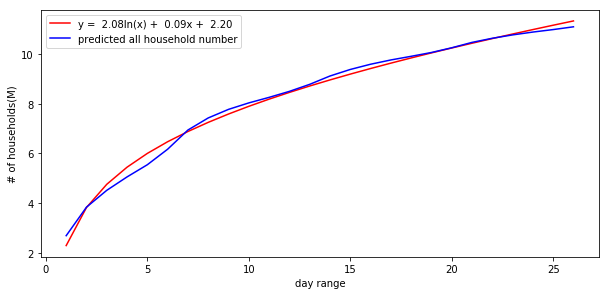

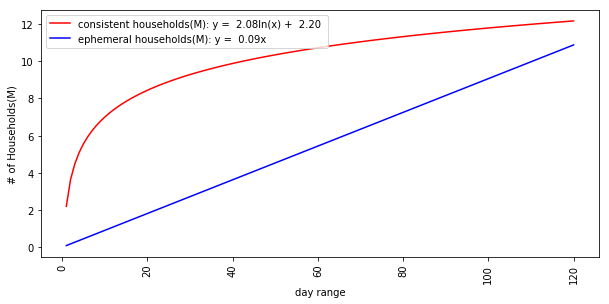

In [52]:
plot_curve(hbo)

# NBCU

consistent households (per month)  2.39M
ephemeral households (per day)  0.10M 


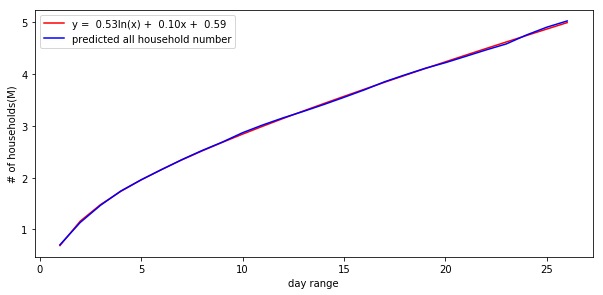

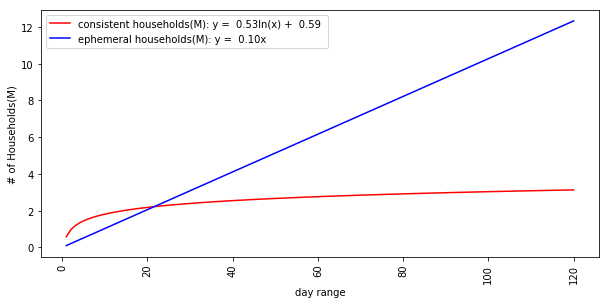

In [53]:
plot_curve(nbcu_central)

# Hulu

consistent households (per month) 29.15M
ephemeral households (per day)  0.17M 


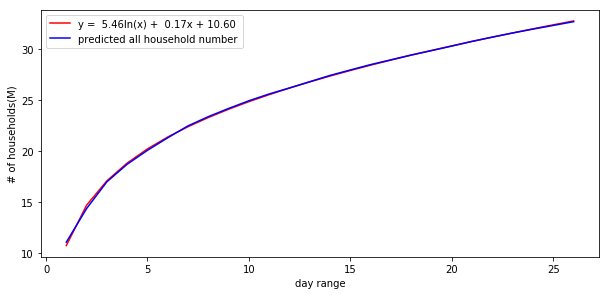

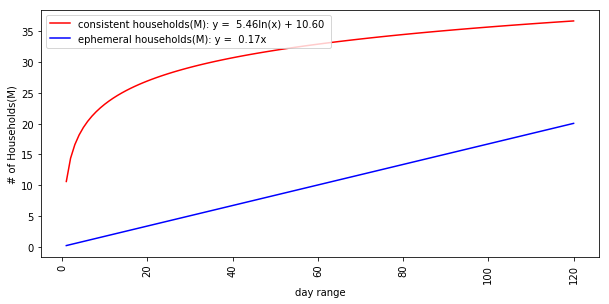

In [54]:
# https://muchneeded.com/hulu-statistics/
#
# In January 2019, Hulu announced that it has surpassed the 25 million subscribers figure. This 48% subscriber 
# increase year over year as Hulu had 17 million subscribers in early 2018.
#
plot_curve(hulu)